In [1]:
import spotipy  
from spotipy.oauth2 import SpotifyOAuth  
  
sp_oauth = SpotifyOAuth(client_id="INSERT CLIENT ID HERE", client_secret="INSERT SECRET KEY HERE", redirect_uri="https://tswiftanalyzer.wordpress.com")  
  
access_token = sp_oauth.get_access_token()  
#refresh_token = sp_oauth.get_refresh_token()  



/var/folders/6l/vqcfbtfs06d12ydv6_y03hm40000gn/T/ipykernel_32590/3078053358.py:6: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  access_token = sp_oauth.get_access_token()


In [17]:
# Code to make individual files
from spotipy import Spotify  
import pandas as pd
from tqdm import tqdm

sp = Spotify(auth_manager=sp_oauth)  


# Header order: Song Name, Album (if applicable), Release Date, URI, Popularity, Explicit, Danceability, Energy, Key, Loudness, 
# Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration, Time Signature

def song_data_from_album(album):
    # Album tracks is every track from the album, album info is the metadata about the album itself
    album_tracks = sp.album_tracks(album, limit=50)
    album_info = sp.album(album)
    album_name = album_info["name"]
    ret = []
    
    # Loop through each song in the album
    for i in range(0,len(album_tracks["items"])):
        song_data = []
        
        #Get URI and song name
        uri = album_tracks["items"][i]["uri"]
        song_name = album_tracks["items"][i]["name"]
        
        #Append to list, along with the album name that this track belongs to
        song_data.append(song_name)
        song_data.append(album_name)
        song_data.append(album_info["release_date"])
        song_data.append(uri)
        
        # Get song data from this song
        extracted = extract_song_data(uri)
        for item in extracted:
            song_data.append(item)
            
        # Add everything to ret for returning
        ret.append(song_data)
        
    # Ret is a list containing every song in the album and its desired metadata and song characteristics
    df = pd.DataFrame(data=ret)
    new_header = ["Song Name", "Album (if applicable)", "Release Date","URI", "Popularity", "Explicit", "Danceability", "Energy", "Key", "Loudness", 
              "Mode", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration", 
              "Time Signature"]

    df.to_csv(f"{album_name}.csv", header=new_header)  
    return
            
            
# Function to get the song data when given the URI
def extract_song_data(song_uri):
    ret = []
    data = sp.audio_features(song_uri)[0]
    track = sp.track(song_uri)
    ret.append(track["popularity"])
    ret.append(track["explicit"])
    ret.append(data["danceability"])
    ret.append(data["energy"])
    ret.append(data["key"])
    ret.append(data["loudness"])
    ret.append(data["mode"])
    ret.append(data["speechiness"])
    ret.append(data["acousticness"])
    ret.append(data["instrumentalness"])
    ret.append(data["liveness"])
    ret.append(data["valence"])
    ret.append(data["tempo"])
    ret.append(data["duration_ms"])
    ret.append(data["time_signature"])
    return ret # A list of the characteristics of that song

albums = ["https://open.spotify.com/album/1o59UpKw81iHR0HPiSkJR0?si=B6cM3uywQFaBBfI_07PdOw",
          "https://open.spotify.com/album/5AEDGbliTTfjOB8TSm1sxt?si=HgvOMx1ARru7-qM942xOcA",
          "https://open.spotify.com/album/1fnJ7k0bllNfL1kVdNVW1A?si=mV7Lls4URkGJqkjwCUmttg",
          "https://open.spotify.com/album/6kZ42qRrzov54LcAk4onW9?si=4kHwYerPQYKx8M3thCpUDw",
          "https://open.spotify.com/album/4hDok0OAJd57SGIT8xuWJH?si=NbTeuDMHReiOQqk9MMbIsA",
          "https://open.spotify.com/album/6AORtDjduMM3bupSWzbTSG?si=vNWUk-eeQd6myacrJOdzXg",
          "https://open.spotify.com/album/1pzvBxYgT6OVwJLtHkrdQK?si=W8lFObTKQnqWKChm-05-NA",
          "https://open.spotify.com/album/1NAmidJlEaVgA3MpcPFYGq?si=oow8b2hxR_2DME7Fqcj7bQ",
          "https://open.spotify.com/album/6DEjYFkNZh67HP7R9PSZvv?si=y3oPFqeZSuaQqKoi8uWe8A",
          "https://open.spotify.com/album/1yGbNOtRIgdIiGHOEBaZWf?si=W6Yach9bRDun9HkCSOKWmQ",
          "https://open.spotify.com/album/1KVKqWeRuXsJDLTW0VuD29?si=VMYWic4TSqyrWUtqJ7pQbA",
          "https://open.spotify.com/album/6S6JQWzUrJVcJLK4fi74Fw?si=IC0eR8-qSuudCHJL6SS2kg",
          "https://open.spotify.com/album/2gP2LMVcIFgVczSJqn340t?si=MJe2qRaKSUe-4ADo2TWVyA",
          "https://open.spotify.com/album/5eyZZoQEFQWRHkV2xgAeBw?si=CBYNndmiQViigNje-955OQ"
         ]

for album in tqdm(albums, desc="Progress"):
    song_data_from_album(album)



Progress: 100%|█████████████████████████████████| 14/14 [00:45<00:00,  3.27s/it]


In [7]:
# Code to make aggregated file
from spotipy import Spotify  
import pandas as pd
from tqdm import tqdm

sp = Spotify(auth_manager=sp_oauth)  


# Header order: Song Name, Album (if applicable), Release Date, URI, Popularity, Explicit, Danceability, Energy, Key, Loudness, 
# Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration, Time Signature

albums = ["https://open.spotify.com/album/1o59UpKw81iHR0HPiSkJR0?si=B6cM3uywQFaBBfI_07PdOw",
          "https://open.spotify.com/album/5AEDGbliTTfjOB8TSm1sxt?si=HgvOMx1ARru7-qM942xOcA",
          "https://open.spotify.com/album/1fnJ7k0bllNfL1kVdNVW1A?si=mV7Lls4URkGJqkjwCUmttg",
          "https://open.spotify.com/album/6kZ42qRrzov54LcAk4onW9?si=4kHwYerPQYKx8M3thCpUDw",
          "https://open.spotify.com/album/4hDok0OAJd57SGIT8xuWJH?si=NbTeuDMHReiOQqk9MMbIsA",
          "https://open.spotify.com/album/6AORtDjduMM3bupSWzbTSG?si=vNWUk-eeQd6myacrJOdzXg",
          "https://open.spotify.com/album/1pzvBxYgT6OVwJLtHkrdQK?si=W8lFObTKQnqWKChm-05-NA",
          "https://open.spotify.com/album/1NAmidJlEaVgA3MpcPFYGq?si=oow8b2hxR_2DME7Fqcj7bQ",
          "https://open.spotify.com/album/6DEjYFkNZh67HP7R9PSZvv?si=y3oPFqeZSuaQqKoi8uWe8A",
          "https://open.spotify.com/album/1yGbNOtRIgdIiGHOEBaZWf?si=W6Yach9bRDun9HkCSOKWmQ",
          "https://open.spotify.com/album/1KVKqWeRuXsJDLTW0VuD29?si=VMYWic4TSqyrWUtqJ7pQbA",
          "https://open.spotify.com/album/6S6JQWzUrJVcJLK4fi74Fw?si=IC0eR8-qSuudCHJL6SS2kg",
          "https://open.spotify.com/album/2gP2LMVcIFgVczSJqn340t?si=MJe2qRaKSUe-4ADo2TWVyA",
          "https://open.spotify.com/album/5eyZZoQEFQWRHkV2xgAeBw?si=CBYNndmiQViigNje-955OQ"
         ]

# Function to get the song data when given the URI
def extract_song_data(song_uri):
    ret = []
    data = sp.audio_features(song_uri)[0]
    track = sp.track(song_uri)
    ret.append(track["popularity"])
    ret.append(track["explicit"])
    ret.append(data["danceability"])
    ret.append(data["energy"])
    ret.append(data["key"])
    ret.append(data["loudness"])
    ret.append(data["mode"])
    ret.append(data["speechiness"])
    ret.append(data["acousticness"])
    ret.append(data["instrumentalness"])
    ret.append(data["liveness"])
    ret.append(data["valence"])
    ret.append(data["tempo"])
    ret.append(data["duration_ms"])
    ret.append(data["time_signature"])
    return ret # A list of the characteristics of that song

ret = []

for album in tqdm(albums, desc="Progress"):
    # Album tracks is every track from the album, album info is the metadata about the album itself
    album_tracks = sp.album_tracks(album, limit=50)
    album_info = sp.album(album)
    album_name = album_info["name"]
    
    # Loop through each song in the album
    for i in range(0,len(album_tracks["items"])):
        song_data = []
        
        #Get URI and song name
        uri = album_tracks["items"][i]["uri"]
        song_name = album_tracks["items"][i]["name"]
        
        #Append to list, along with the album name that this track belongs to
        song_data.append(song_name)
        song_data.append(album_name)
        song_data.append(album_info["release_date"])
        song_data.append(uri)
        
        # Get song data from this song
        extracted = extract_song_data(uri)
        for item in extracted:
            song_data.append(item)
            
        # Add everything to ret for returning
        ret.append(song_data)
        
# Ret is a list containing every song in the album and its desired metadata and song characteristics
df = pd.DataFrame(data=ret)
new_header = ["Song Name", "Album (if applicable)", "Release Date","URI", "Popularity", "Explicit", "Danceability", "Energy", "Key", "Loudness", 
          "Mode", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration", 
          "Time Signature"]

df.to_csv("aggregate_data.csv", header=new_header)  

            
            







Progress: 100%|█████████████████████████████████| 14/14 [00:47<00:00,  3.42s/it]


In [27]:
# Code to add averages at the bottom of every column
import pandas as pd
import os

current_dir = os.getcwd()
directory = f"{current_dir}/data"

# df = pd.read_csv(f"{directory}/1989 (Deluxe).csv")

# df.at[len(df),"Popularity"] = df["Popularity"].mean()
# df.at[len(df)-1,"Danceability"] = df["Danceability"].mean()
# df.at[len(df)-1,"Energy"] = df["Energy"].mean()
# df.at[len(df)-1,"Loudness"] = df["Loudness"].mean()
# df.at[len(df)-1,"Speechiness"] = df["Speechiness"].mean()
# df.at[len(df)-1,"Acousticness"] = df["Acousticness"].mean()
# df.at[len(df)-1,"Instrumentalness"] = df["Instrumentalness"].mean()
# df.at[len(df)-1,"Liveness"] = df["Liveness"].mean()
# df.at[len(df)-1,"Valence"] = df["Valence"].mean()
# df.at[len(df)-1,"Tempo"] = df["Tempo"].mean()
# df.at[len(df)-1,"Duration"] = df["Duration"].mean()

#print(df)

for file in os.listdir(directory):
    df = pd.read_csv(f"{directory}/{file}")
    df.at[len(df),"Popularity"] = df["Popularity"].mean()
    df.at[len(df)-1,"Danceability"] = df["Danceability"].mean()
    df.at[len(df)-1,"Energy"] = df["Energy"].mean()
    df.at[len(df)-1,"Loudness"] = df["Loudness"].mean()
    df.at[len(df)-1,"Speechiness"] = df["Speechiness"].mean()
    df.at[len(df)-1,"Acousticness"] = df["Acousticness"].mean()
    df.at[len(df)-1,"Instrumentalness"] = df["Instrumentalness"].mean()
    df.at[len(df)-1,"Liveness"] = df["Liveness"].mean()
    df.at[len(df)-1,"Valence"] = df["Valence"].mean()
    df.at[len(df)-1,"Tempo"] = df["Tempo"].mean()
    df.at[len(df)-1,"Duration"] = df["Duration"].mean()
    
    df.at[len(df)-1, "Unnamed: 0"] = "null"
    df.at[len(df)-1, "Song Name"] = "null"
    df.at[len(df)-1, "Album (if applicable)"] = "null"
    df.at[len(df)-1, "Release Date"] = df["Release Date"][1]
    df.at[len(df)-1, "URI"] = "null"
    df.at[len(df)-1, "Explicit"] = "null"
    df.at[len(df)-1, "Key"] = "null"
    df.at[len(df)-1, "Mode"] = "null"
    df.at[len(df)-1, "Time Signature"] = "null"
    
    
    file = file.split(".")[0]
    df.to_csv(f"{file}_with_avg.csv")
    

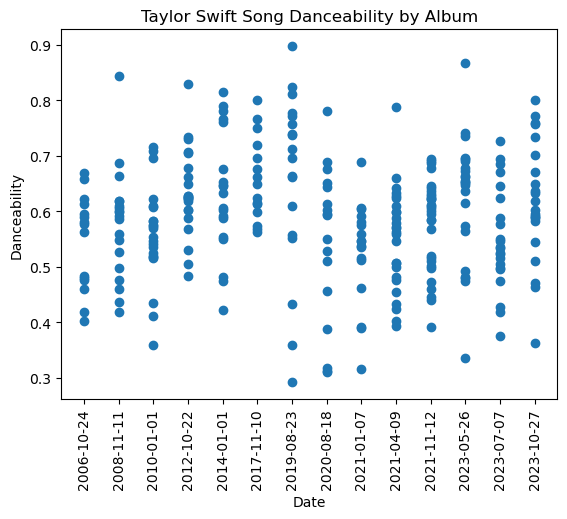

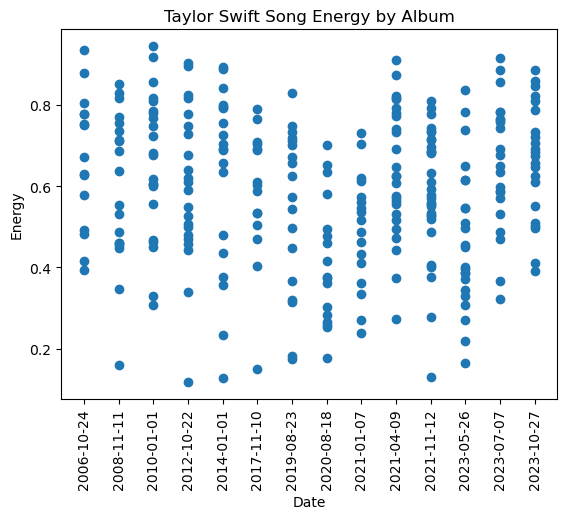

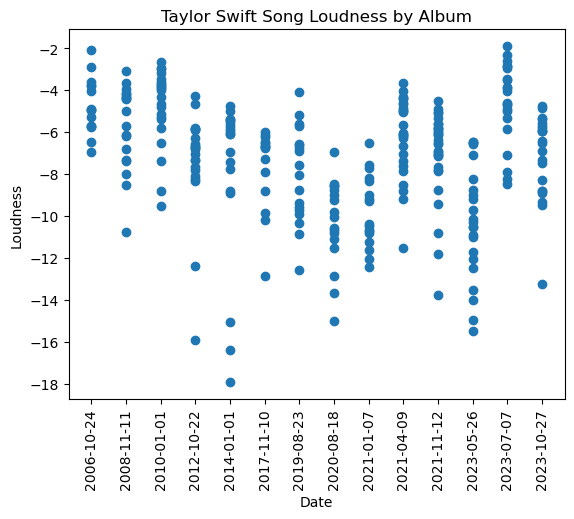

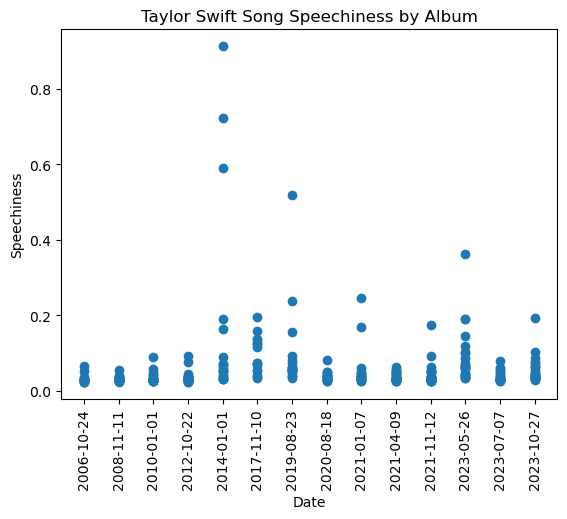

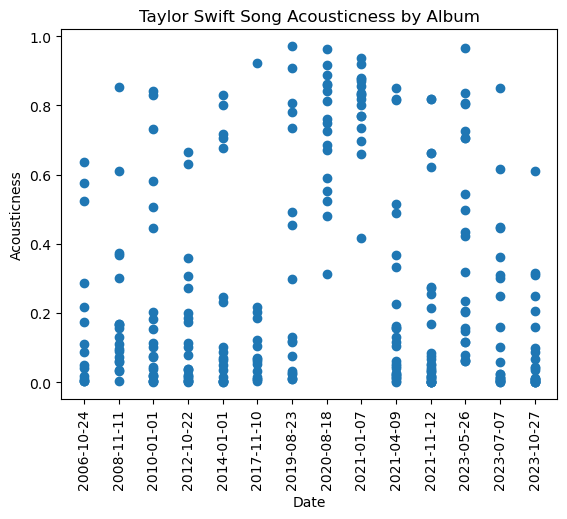

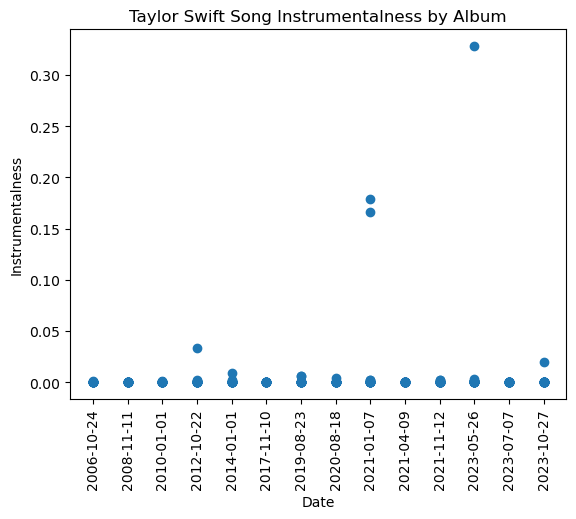

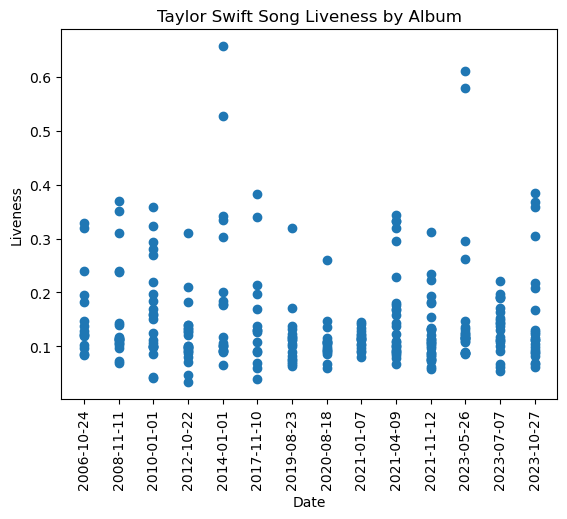

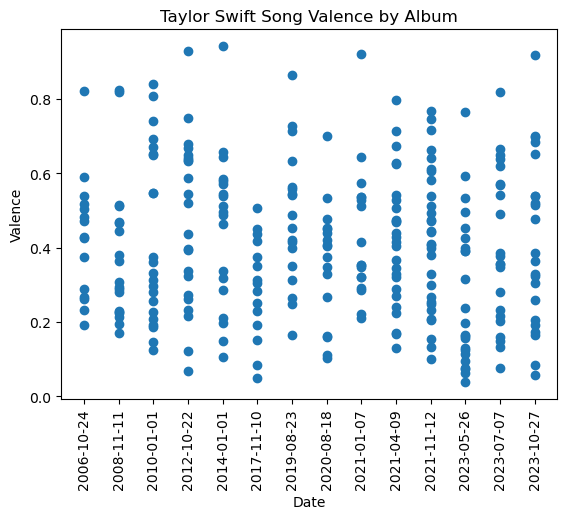

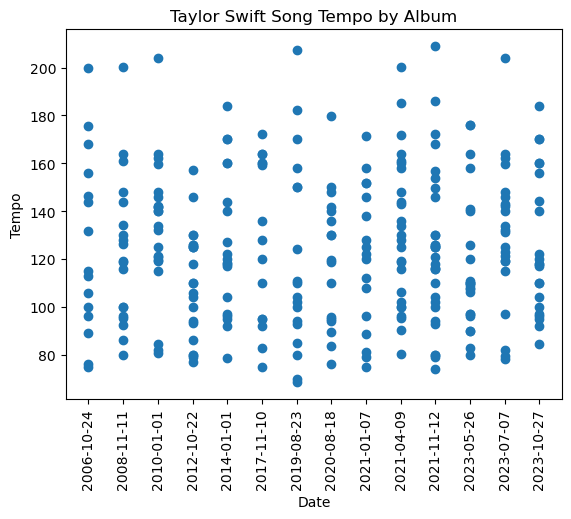

In [24]:
# Create Graphs
import os
from matplotlib import pyplot as plt

current_dir = os.getcwd()

df = pd.read_csv(f"{current_dir}/aggregate_data.csv")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Danceability"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Danceability by Album")
plt.xlabel("Date")
plt.ylabel("Danceability")
ax.invert_xaxis()
plt.savefig('Danceability_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Energy"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Energy by Album")
plt.xlabel("Date")
plt.ylabel("Energy")
ax.invert_xaxis()
plt.savefig('Energy_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Loudness"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Loudness by Album")
plt.xlabel("Date")
plt.ylabel("Loudness")
ax.invert_xaxis()
plt.savefig('Loudness_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Speechiness"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Speechiness by Album")
plt.xlabel("Date")
plt.ylabel("Speechiness")
ax.invert_xaxis()
plt.savefig('Speechiness_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Acousticness"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Acousticness by Album")
plt.xlabel("Date")
plt.ylabel("Acousticness")
ax.invert_xaxis()
plt.savefig('Acousticness_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Instrumentalness"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Instrumentalness by Album")
plt.xlabel("Date")
plt.ylabel("Instrumentalness")
ax.invert_xaxis()
plt.savefig('Instrumentalness_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Liveness"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Liveness by Album")
plt.xlabel("Date")
plt.ylabel("Liveness")
ax.invert_xaxis()
plt.savefig('Liveness_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Valence"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Valence by Album")
plt.xlabel("Date")
plt.ylabel("Valence")
ax.invert_xaxis()
plt.savefig('Valence_all.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(df["Release Date"], df["Tempo"])
plt.xticks(rotation=90)
plt.title("Taylor Swift Song Tempo by Album")
plt.xlabel("Date")
plt.ylabel("Tempo")
ax.invert_xaxis()
plt.savefig('Tempo_all.png', bbox_inches="tight")

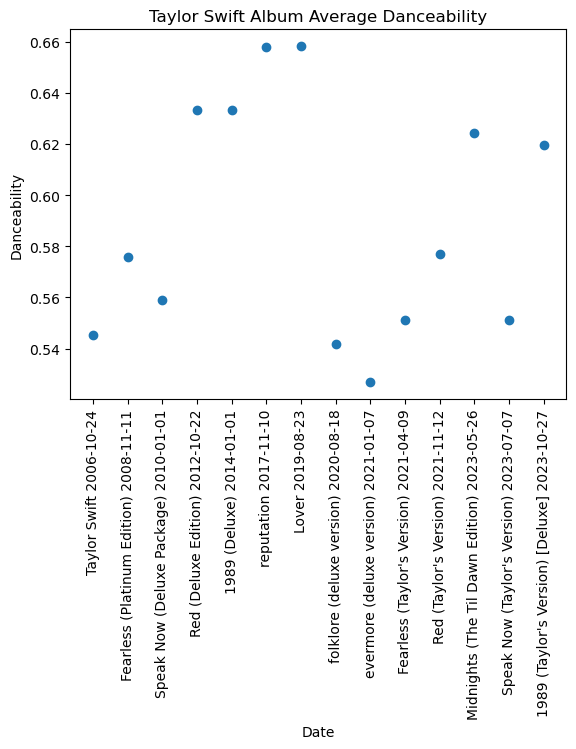

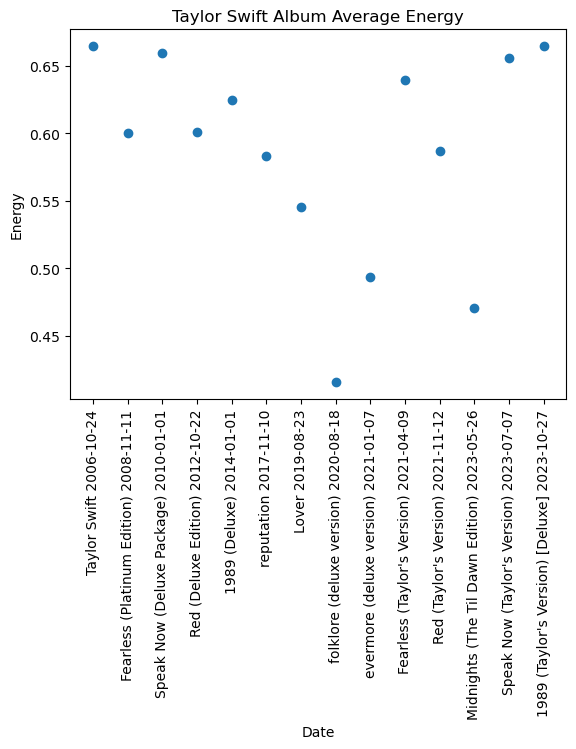

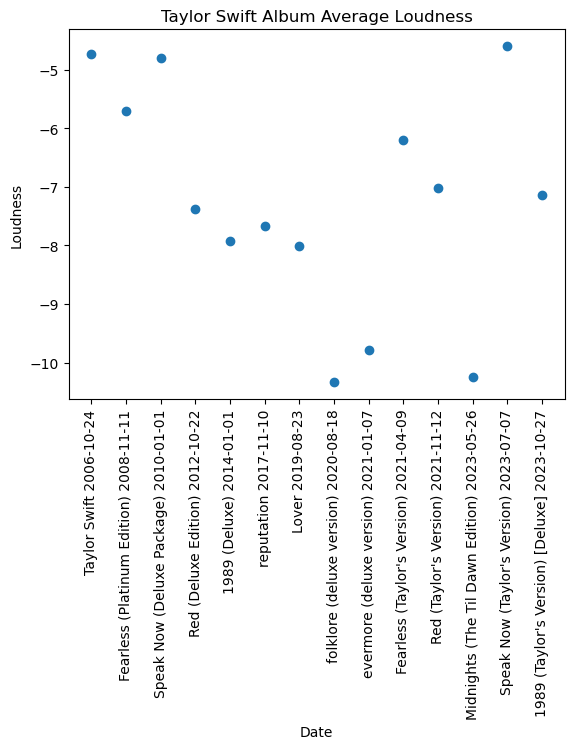

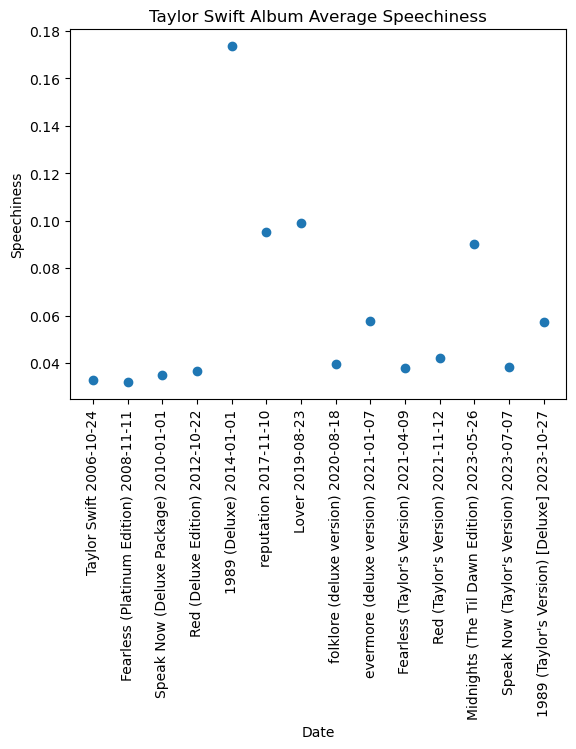

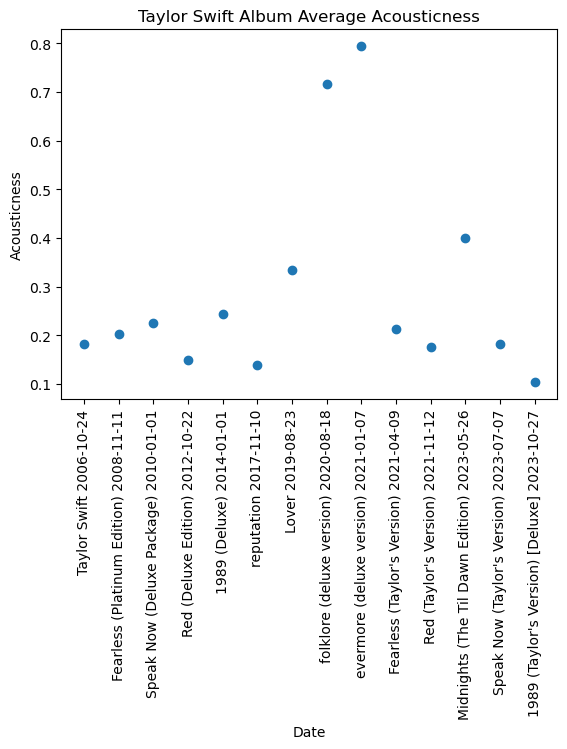

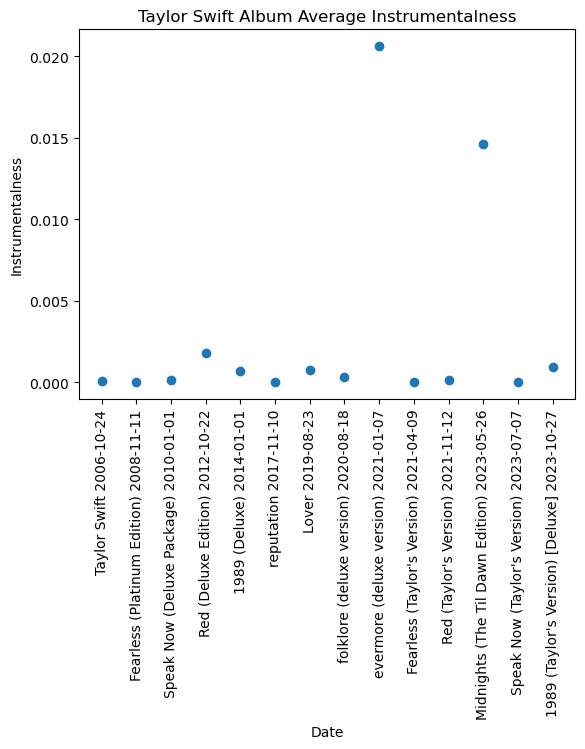

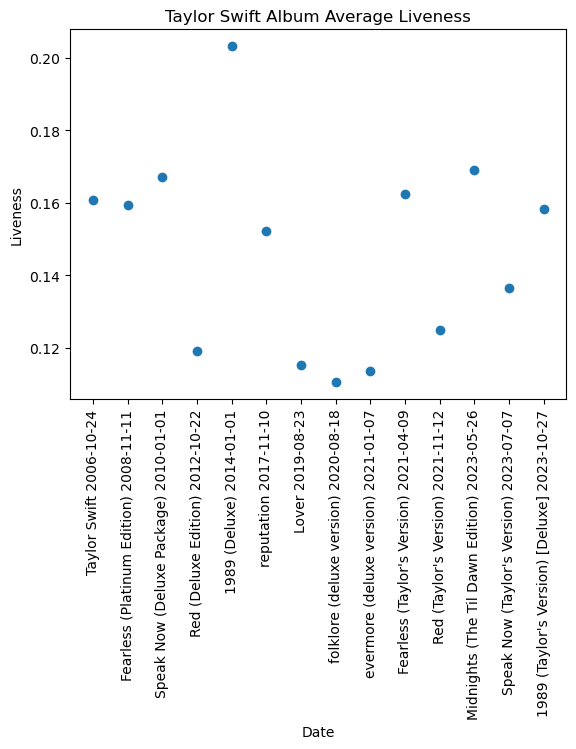

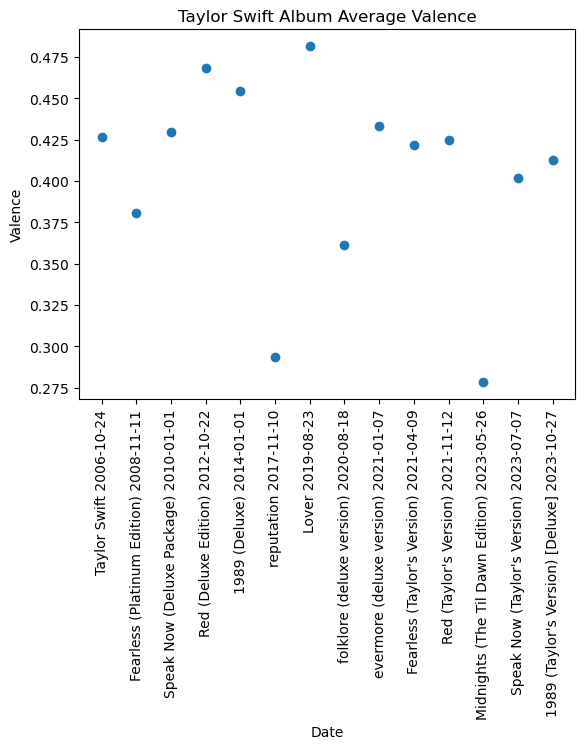

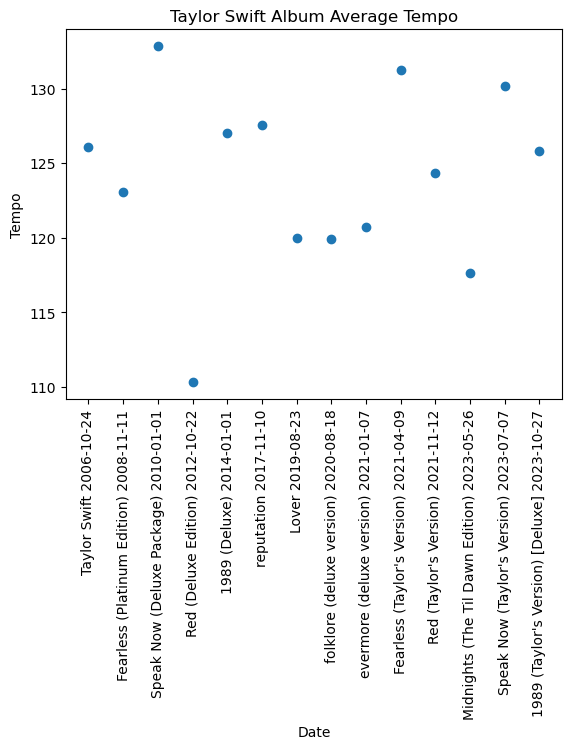

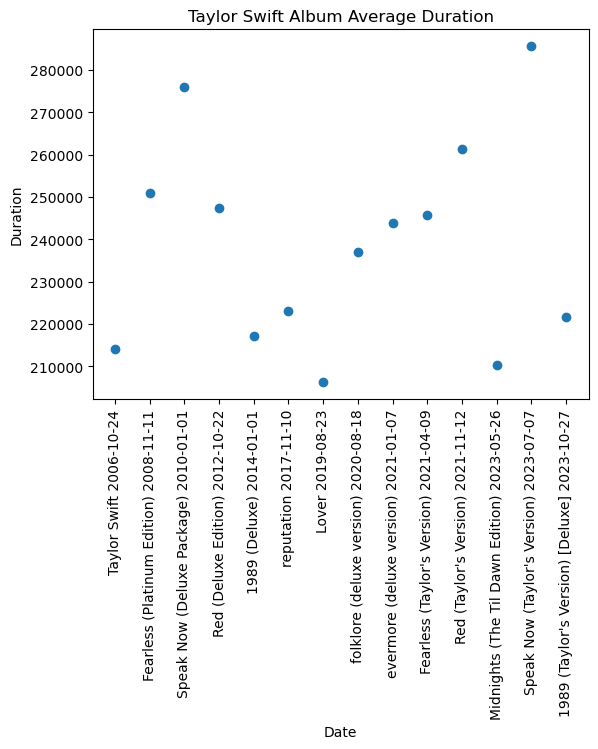

In [23]:
# Code to make graphs of just the average values for each album
import os
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict

current_dir = os.getcwd()
directory = f"{current_dir}/data"

dates = []
album = []
danceability_avgs = []
energy_avgs = []
loudness_avgs = []
speechiness_avgs = []
acousticness_avgs = []
instrumentalness_avgs = []
liveness_avgs = []
valence_avgs = []
tempo_avgs = []
duration_avgs = []


for file in os.listdir(directory):
    if file.endswith(".csv"):
        df = pd.read_csv(f"{directory}/{file}")
        temp = str(df['Album (if applicable)'].values[-1]) + " " + str(df['Release Date'].values[-1])
        album.append(temp)
        dates.append(df['Release Date'].values[-1])
        danceability_avgs.append(df["Danceability"].mean())
        energy_avgs.append(df["Energy"].mean())
        loudness_avgs.append(df["Loudness"].mean())
        speechiness_avgs.append(df["Speechiness"].mean())
        acousticness_avgs.append(df["Acousticness"].mean())
        instrumentalness_avgs.append(df["Instrumentalness"].mean())
        liveness_avgs.append(df["Liveness"].mean())
        valence_avgs.append(df["Valence"].mean())
        tempo_avgs.append(df["Tempo"].mean())
        duration_avgs.append(df["Duration"].mean())
        
        
dates, album, danceability_avgs, energy_avgs, loudness_avgs, speechiness_avgs, acousticness_avgs, instrumentalness_avgs, liveness_avgs, valence_avgs, tempo_avgs, duration_avgs = zip(*sorted(zip(dates, album, danceability_avgs, energy_avgs, loudness_avgs, speechiness_avgs, acousticness_avgs, instrumentalness_avgs, liveness_avgs, valence_avgs, tempo_avgs, duration_avgs)))

fig, ax = plt.subplots()
plt.scatter(album, danceability_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Danceability")
plt.xlabel("Date")
plt.ylabel("Danceability")
plt.savefig('Danceability_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, energy_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Energy")
plt.xlabel("Date")
plt.ylabel("Energy")
plt.savefig('Energy_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, loudness_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Loudness")
plt.xlabel("Date")
plt.ylabel("Loudness")
plt.savefig('Loudness_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, speechiness_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Speechiness")
plt.xlabel("Date")
plt.ylabel("Speechiness")
plt.savefig('Speechiness_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, acousticness_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Acousticness")
plt.xlabel("Date")
plt.ylabel("Acousticness")
plt.savefig('Acousticness_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, instrumentalness_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Instrumentalness")
plt.xlabel("Date")
plt.ylabel("Instrumentalness")
plt.savefig('Instrumentalness_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, liveness_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Liveness")
plt.xlabel("Date")
plt.ylabel("Liveness")
plt.savefig('Liveness_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, valence_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Valence")
plt.xlabel("Date")
plt.ylabel("Valence")
plt.savefig('Valence_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, tempo_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Tempo")
plt.xlabel("Date")
plt.ylabel("Tempo")
plt.savefig('Tempo_avgs.png', bbox_inches="tight")

fig, ax = plt.subplots()
plt.scatter(album, duration_avgs)
plt.xticks(rotation=90)
plt.title("Taylor Swift Album Average Duration")
plt.xlabel("Date")
plt.ylabel("Duration")
plt.savefig('Duration_avgs.png', bbox_inches="tight")

